In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import gzip
import json
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Exploring Data

In [3]:
df = pd.read_csv('./drive/MyDrive/datasets/combined.csv', low_memory=False)

In [ ]:
display(df)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
749399,4.0,False,"07 16, 2016",A1E50L7PCVXLN4,B01FFVDY9M,Colinda,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN,{'Platform:': ' Key Card'},NaN
749400,3.0,False,"06 17, 2017",AVU1ILDDYW301,B01HAP3NUG,G. Hearn,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN,NaN,NaN
749401,4.0,False,"01 24, 2017",A2LW5AL0KQ9P1M,B01HAP3NUG,Dr. E,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN,NaN,NaN
749402,3.0,False,"06 14, 2018",AZ515FFZ7I2P7,B01HAP47PQ,Jerry Jackson Jr.,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN,{'Platform:': ' PC Disc'},NaN


In [ ]:
df.dtypes

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
style              object
image              object
dtype: object

In [ ]:
df.duplicated().sum()

58255

In [4]:
df = df.drop_duplicates()
display(df)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
749399,4.0,False,"07 16, 2016",A1E50L7PCVXLN4,B01FFVDY9M,Colinda,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN,{'Platform:': ' Key Card'},NaN
749400,3.0,False,"06 17, 2017",AVU1ILDDYW301,B01HAP3NUG,G. Hearn,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN,NaN,NaN
749401,4.0,False,"01 24, 2017",A2LW5AL0KQ9P1M,B01HAP3NUG,Dr. E,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN,NaN,NaN
749402,3.0,False,"06 14, 2018",AZ515FFZ7I2P7,B01HAP47PQ,Jerry Jackson Jr.,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN,{'Platform:': ' PC Disc'},NaN


In [5]:
# Dropping the unnecessary columns
drop_col = [col for col in df.columns if col not in ['overall', 'verified', 'reviewText', 'summary']] # Getting all column names that are unneeded
df.drop(drop_col, axis=1, inplace=True) # Dropping them from our df

<ipython-input-5-8b467537d64a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(drop_col, axis=1, inplace=True) # Dropping them from our df


In [6]:
df.isna().sum()

overall         0
verified        0
reviewText    349
summary       183
dtype: int64

In [7]:
# Dropping the null values in the reviewText and summary columns

# Maybe instead of droppping null from summary, just make them empty ''
df.dropna(subset=['reviewText', 'summary'], inplace=True)

In [8]:
df.isna().sum()

overall       0
verified      0
reviewText    0
summary       0
dtype: int64

In [9]:
# Checking the distribution of ratings
df['overall'].value_counts()

overall
5.0    510020
4.0     96238
3.0     43210
1.0     21768
2.0     19390
Name: count, dtype: int64

# Data Preprocessing + Transformation

### Adding sentiment column

In [10]:
# Creating a sentiment column by converting the numeric rating to postive, neutral, negative
conditions = [
    (df['overall']<=2.0),
    (df['overall']==3.0),
    (df['overall']>=4.0)
]
vals = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(conditions, vals)
display(df)

,overall,verified,reviewText,summary,sentiment
0,5.0,True,It's good for beginners,Five Stars,positive
1,5.0,True,I recommend this starter Ukulele kit. I has e...,Five Stars,positive
2,5.0,True,G'daughter received this for Christmas present...,Learning new songs to play regularly,positive
3,4.0,True,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,positive
4,1.0,True,Please pay attention better than I did to the ...,Poor Quality product.,negative
...,...,...,...,...,...
749399,4.0,False,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,positive
749400,3.0,False,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",neutral
749401,4.0,False,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",positive
749402,3.0,False,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,neutral


In [11]:
# Combining reviewText and Summary
df['reviewTextSumm'] = df['reviewText'] + " " + df['summary']
display(df)

,overall,verified,reviewText,summary,sentiment,reviewTextSumm
0,5.0,True,It's good for beginners,Five Stars,positive,It's good for beginners Five Stars
1,5.0,True,I recommend this starter Ukulele kit. I has e...,Five Stars,positive,I recommend this starter Ukulele kit. I has e...
2,5.0,True,G'daughter received this for Christmas present...,Learning new songs to play regularly,positive,G'daughter received this for Christmas present...
3,4.0,True,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,positive,"According to my order history, I bought this t..."
4,1.0,True,Please pay attention better than I did to the ...,Poor Quality product.,negative,Please pay attention better than I did to the ...
...,...,...,...,...,...,...
749399,4.0,False,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,positive,When I ordered this it was listed as Photo Edi...
749400,3.0,False,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",neutral,This software has SO much going on. Theres a ...
749401,4.0,False,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",positive,I have used both more complex and less complex...
749402,3.0,False,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,neutral,Pinnacle Studio 20 Ultimate is a perfectly ser...


### Creating train/val/test splits

In [12]:
# 70:15:15 split
x_train, x_test, y_train, y_test = train_test_split(df['reviewTextSumm'], df['sentiment'], test_size=0.3, random_state=42, stratify=df['sentiment'])
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
print('train shape: ', x_train.shape, y_train.shape)
print('val shape: ', x_val.shape, y_val.shape)
print('test shape: ', x_test.shape, y_test.shape)


train shape:  (483438,) (483438,)
val shape:  (103594,) (103594,)
test shape:  (103594,) (103594,)


In [13]:
STOP_WORDS = set(stopwords.words('english'))

def preprocess_text(sentence, stop, type_proc=None):  # Maybe set default type to None; maybe set default to stop
  """
  Applied to the dataframe to preprocess reviewText
  Parameters:
    stop: Set of stopwords
    type: Defines if the sentence is only preprocessed, or includes stemming, or lemmatization
    - Acceptable inputs: "None", "stem", "lem"
  """
  words = []
  for word in sentence.lower().replace('\n', '').strip().split():  # Could also just use a tokenizer here

    # Could add more filtering
    word = re.sub('\d', '', word)        # Removes digits from the word
    word = re.sub('[^\w\s]', '', word)   # Removes non-characters from the word

    if word not in stop and word != '':  # Check if the word is in the stop words and should be excluded (don't know if the word != '' is needed)
      words.append(preprocess_type(word, type_proc))

  return ' '.join(words)                 # Converting back into a sentence

def preprocess_type(word, type_proc):
  """
  Helper function for preprocess_text
  Depending on the type: None, stem, or lem
  Returns the word, a stemmed word, or a lemmatized word
  """
  match type_proc:
    case None:
      return word
    case "stem":
      return PorterStemmer().stem(word)
    case "lem":
      return WordNetLemmatizer().lemmatize(word)


# Applying the preprocessing

x_train_proc = list(map(lambda x: preprocess_text(x, STOP_WORDS), x_train))
x_val_proc = list(map(lambda x: preprocess_text(x, STOP_WORDS), x_val))
x_test_proc = list(map(lambda x: preprocess_text(x, STOP_WORDS), x_test))

x_train_stem = list(map(lambda x: preprocess_text(x, STOP_WORDS, "stem"), x_train))
x_val_stem = list(map(lambda x: preprocess_text(x, STOP_WORDS, "stem"), x_val))
x_test_stem = list(map(lambda x: preprocess_text(x, STOP_WORDS, "stem"), x_test))

x_train_lem = list(map(lambda x: preprocess_text(x, STOP_WORDS, "lem"), x_train))
x_val_lem = list(map(lambda x: preprocess_text(x, STOP_WORDS, "lem"), x_val))
x_test_lem = list(map(lambda x: preprocess_text(x, STOP_WORDS, "lem"), x_test))

### Transforming with tfidf/countvectorizer

In [14]:
# CountVectorizer (Bag of Words)
vectorizer = CountVectorizer()
x_train_bow = vectorizer.fit_transform(x_train)
x_val_bow = vectorizer.transform(x_val)
x_test_bow = vectorizer.transform(x_test)


vectorizer = CountVectorizer()
x_train_proc_bow = vectorizer.fit_transform(x_train_proc)
x_val_proc_bow = vectorizer.transform(x_val_proc)
x_test_proc_bow = vectorizer.transform(x_test_proc)


vectorizer = CountVectorizer()
x_train_stem_bow = vectorizer.fit_transform(x_train_stem)
x_val_stem_bow = vectorizer.transform(x_val_stem)
x_test_stem_bow = vectorizer.transform(x_test_stem)



vectorizer = CountVectorizer()
x_train_lem_bow = vectorizer.fit_transform(x_train_lem)
x_val_lem_bow = vectorizer.transform(x_val_lem)
x_test_lem_bow = vectorizer.transform(x_test_lem)


### Apply tfidf vectorizer (Term Frequency - Inverse Document Frequency)
tf_vector = TfidfVectorizer()
x_train_tf = tf_vector.fit_transform(x_train)
x_val_tf = tf_vector.transform(x_val)
x_test_tf = tf_vector.transform(x_test)



tf_vector = TfidfVectorizer()
x_train_proc_tf = tf_vector.fit_transform(x_train_proc)
x_val_proc_tf = tf_vector.transform(x_val_proc)
x_test_proc_tf = tf_vector.transform(x_test_proc)


tf_vector = TfidfVectorizer()
x_train_stem_tf = tf_vector.fit_transform(x_train_stem)
x_val_stem_tf = tf_vector.transform(x_val_stem)
x_test_stem_tf = tf_vector.transform(x_test_stem)



tf_vector = TfidfVectorizer()
x_train_lem_tf = tf_vector.fit_transform(x_train_lem)
x_val_lem_tf = tf_vector.transform(x_val_lem)
x_test_lem_tf = tf_vector.transform(x_test_lem)


# Modeling

### Baseline

In [ ]:
# Baseline model that trains on train, and tests on validation
print("Baseline Logistic Regression")
print()
############ Count Vectorizer tests ############

print("CountVectorized words")
# Baseline
log_model = LogisticRegression(max_iter = 2500)
log_model.fit(x_train_bow, y_train)
log_sent = log_model.predict(x_val_bow)
print("Base Accuracy: ", accuracy_score(y_val, log_sent))

print(classification_report(y_val, log_sent))

print('########################################################')
# Preprocess
log_model_proc = LogisticRegression(max_iter = 2500)
log_model_proc.fit(x_train_proc_bow, y_train)
log_sent = log_model_proc.predict(x_val_proc_bow)
print("Preprocess Accuracy: ", accuracy_score(y_val, log_sent))

print(classification_report(y_val, log_sent))

print('########################################################')

# Stem
log_model_stem = LogisticRegression(max_iter = 2500)
log_model_stem.fit(x_train_stem_bow, y_train)
log_sent = log_model_stem.predict(x_val_stem_bow)
print("Stem Accuracy: ", accuracy_score(y_val, log_sent))

print(classification_report(y_val, log_sent))

print('########################################################')

# Lemmatize
log_model_lem = LogisticRegression(max_iter = 2500)
log_model_lem.fit(x_train_lem_bow, y_train)
log_sent = log_model_lem.predict(x_val_lem_bow)
print("Lem Accuracy: ", accuracy_score(y_val, log_sent))

print(classification_report(y_val, log_sent))

print('########################################################')
############ Tfidf Vectorizer tests ############
print()
print("Tfidf words")

# Baseline
log_model_tf = LogisticRegression(max_iter = 2500)
log_model_tf.fit(x_train_tf, y_train)
log_sent = log_model_tf.predict(x_val_tf)
print("Base Accuracy: ", accuracy_score(y_val, log_sent))
print(classification_report(y_val, log_sent))

print('########################################################')

# Preprocess
log_model_tfproc = LogisticRegression(max_iter = 2500)
log_model_tfproc.fit(x_train_proc_tf, y_train)
log_sent = log_model_tfproc.predict(x_val_proc_tf)
print("Preprocess Accuracy: ", accuracy_score(y_val, log_sent))
print(classification_report(y_val, log_sent))

print('########################################################')

# Stem
log_model_tfstem = LogisticRegression(max_iter = 2500)
log_model_tfstem.fit(x_train_stem_tf, y_train)
log_sent = log_model_tfstem.predict(x_val_stem_tf)
print("Stem Accuracy: ", accuracy_score(y_val, log_sent))
print(classification_report(y_val, log_sent))

print('########################################################')

# Lemmatize
log_model_tflem = LogisticRegression(max_iter = 2500)
log_model_tflem.fit(x_train_lem_tf, y_train)
log_sent = log_model_tflem.predict(x_val_lem_tf)
print("Lem Accuracy: ", accuracy_score(y_val, log_sent))
print(classification_report(y_val, log_sent))

#print('########################################################')

Baseline Logistic Regression

CountVectorized words


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Base Accuracy:  0.9275247601212425
              precision    recall  f1-score   support

    negative       0.73      0.68      0.70      6173
     neutral       0.60      0.45      0.52      6482
    positive       0.96      0.98      0.97     90939

    accuracy                           0.93    103594
   macro avg       0.76      0.70      0.73    103594
weighted avg       0.92      0.93      0.92    103594

########################################################
Preprocess Accuracy:  0.9244743904087109
              precision    recall  f1-score   support

    negative       0.72      0.65      0.68      6173
     neutral       0.60      0.43      0.50      6482
    positive       0.95      0.98      0.97     90939

    accuracy                           0.92    103594
   macro avg       0.76      0.68      0.72    103594
weighted avg       0.92      0.92      0.92    103594

########################################################
Stem Accuracy:  0.9222445315365755
             

### Hyperparameter

### Countvectorizer

In [ ]:
# Many parameters in log regression  apply to specific solvers, so we excluded them
# Only two of the solvers use l1 penalty, so we just ignored it for now

# Bag of words baseline
log_test = LogisticRegression(max_iter=2500)
param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['lbfgs', 'newton-cg', 'sag', 'saga']}]
clf = RandomizedSearchCV(log_test, param_grid, n_jobs=-1, cv=5, n_iter=20)
clf.fit(x_val_bow, y_val)

display(clf.best_params_)
#display(clf.cv_results_)

{'solver': 'sag', 'C': 0.1}

In [ ]:
# preprocess
log_test = LogisticRegression(max_iter=2500)
param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['lbfgs', 'newton-cg', 'sag', 'saga']}]
clf = RandomizedSearchCV(log_test, param_grid, n_jobs=-1, cv=3, n_iter=20)
clf.fit(x_val_proc_bow, y_val)

display(clf.best_params_)

{'solver': 'saga', 'C': 0.1}

In [ ]:
# stem
log_test = LogisticRegression(max_iter=2500)
param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['lbfgs', 'newton-cg', 'sag', 'saga']}]
clf = RandomizedSearchCV(log_test, param_grid, n_jobs=-1, cv=3, n_iter=20)
clf.fit(x_val_stem_bow, y_val)

display(clf.best_params_)

{'solver': 'saga', 'C': 0.1}

In [ ]:
# lem
log_test = LogisticRegression(max_iter=2500)
param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['lbfgs', 'newton-cg', 'sag', 'saga']}]
clf = RandomizedSearchCV(log_test, param_grid, n_jobs=-1, cv=3, n_iter=20)
clf.fit(x_val_lem_bow, y_val)

display(clf.best_params_)

{'solver': 'saga', 'C': 0.1}

### TF-IDF

In [ ]:
# These randomsaerches ran faster than the others
# took 9 minutes

In [ ]:
# baseline tfidf

log_test = LogisticRegression(max_iter=2500)
param_grid = [{'penalty':['l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['lbfgs', 'newton-cg', 'sag', 'saga']}]
clf = RandomizedSearchCV(log_test, param_grid, n_jobs=-1, cv=3, n_iter=20)
clf.fit(x_val_tf, y_val)

display(clf.best_params_)

{'solver': 'sag', 'penalty': 'l2', 'C': 1}

In [ ]:
# preprocess

log_test = LogisticRegression(max_iter=2500)
param_grid = [{'penalty':['l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['lbfgs', 'newton-cg', 'sag', 'saga']}]
clf = RandomizedSearchCV(log_test, param_grid, n_jobs=-1, cv=3, n_iter=20)
clf.fit(x_val_proc_tf, y_val)

display(clf.best_params_)

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}

In [ ]:
# stem

log_test = LogisticRegression(max_iter=2500)
param_grid = [{'penalty':['l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['lbfgs', 'newton-cg', 'sag', 'saga']}]
clf = RandomizedSearchCV(log_test, param_grid, n_jobs=-1, cv=3, n_iter=20)
clf.fit(x_val_stem_tf, y_val)

display(clf.best_params_)

{'solver': 'saga', 'penalty': 'l2', 'C': 1}

In [ ]:
# lem

log_test = LogisticRegression(max_iter=2500)
param_grid = [{'penalty':['l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'solver':['lbfgs', 'newton-cg', 'sag', 'saga']}]
clf = RandomizedSearchCV(log_test, param_grid, n_jobs=-1, cv=3, n_iter=20)
clf.fit(x_val_lem_tf, y_val)

display(clf.best_params_)

{'solver': 'saga', 'penalty': 'l2', 'C': 1}

### Final Models

### Countvectorizer

Each model took roughly 20 to 30 minutes to run

In [ ]:
# Manually input the parameters to save time (don't have to rerun notebook)
# Best model for countvectorizer baseline
model = LogisticRegression(max_iter=2500, C=0.1, solver='sag')
model.fit(x_train_bow, y_train)
pred = model.predict(x_test_bow)
print("Base Accuracy: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Base Accuracy:  0.9283838832364809
              precision    recall  f1-score   support

    negative       0.74      0.66      0.70      6174
     neutral       0.66      0.40      0.50      6481
    positive       0.95      0.98      0.97     90939

    accuracy                           0.93    103594
   macro avg       0.78      0.68      0.72    103594
weighted avg       0.92      0.93      0.92    103594



In [ ]:
# Best model for countvectorizer preprocess
model = LogisticRegression(max_iter=2500, C=0.1, solver='saga')
model.fit(x_train_proc_bow, y_train)
pred = model.predict(x_test_proc_bow)
print("Preproc Accuracy: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Preproc Accuracy:  0.9249860030503697
              precision    recall  f1-score   support

    negative       0.74      0.62      0.67      6174
     neutral       0.66      0.39      0.49      6481
    positive       0.95      0.98      0.96     90939

    accuracy                           0.92    103594
   macro avg       0.78      0.66      0.71    103594
weighted avg       0.92      0.92      0.92    103594



In [ ]:
# Best model for countvectorizer stem
model = LogisticRegression(max_iter=2500, C=0.1, solver='saga')
model.fit(x_train_stem_bow, y_train)
pred = model.predict(x_test_stem_bow)
print("Stem Accuracy: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Stem Accuracy:  0.923267756819893
              precision    recall  f1-score   support

    negative       0.73      0.60      0.66      6174
     neutral       0.67      0.38      0.48      6481
    positive       0.94      0.98      0.96     90939

    accuracy                           0.92    103594
   macro avg       0.78      0.65      0.70    103594
weighted avg       0.91      0.92      0.92    103594



In [ ]:
# Best model for countvectorizer lem
model = LogisticRegression(max_iter=2500, C=0.1, solver='saga')
model.fit(x_train_lem_bow, y_train)
pred = model.predict(x_test_lem_bow)
print("Lem Accuracy: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Lem Accuracy:  0.9239434716296311
              precision    recall  f1-score   support

    negative       0.74      0.61      0.67      6174
     neutral       0.66      0.38      0.48      6481
    positive       0.94      0.98      0.96     90939

    accuracy                           0.92    103594
   macro avg       0.78      0.66      0.70    103594
weighted avg       0.91      0.92      0.92    103594



### TF-IDF

Each model only took around 1 to 3 minutes to run

In [ ]:
# Best model for tfidf baseline

### BEST ###
model = LogisticRegression(max_iter=2500, C=1, solver='sag')
model.fit(x_train_tf, y_train)
pred = model.predict(x_test_tf)
print("Tf Base Accuracy: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Tf Base Accuracy:  0.931530783636118
              precision    recall  f1-score   support

    negative       0.77      0.67      0.72      6174
     neutral       0.69      0.39      0.50      6481
    positive       0.95      0.99      0.97     90939

    accuracy                           0.93    103594
   macro avg       0.80      0.68      0.73    103594
weighted avg       0.92      0.93      0.92    103594



In [ ]:
# Best model for tfidf preprocess
model = LogisticRegression(max_iter=2500, C=1, solver='lbfgs')
model.fit(x_train_proc_tf, y_train)
pred = model.predict(x_test_proc_tf)
print("Tf Preproc Accuracy: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Tf Preproc Accuracy:  0.9280460258316119
              precision    recall  f1-score   support

    negative       0.77      0.63      0.69      6174
     neutral       0.70      0.37      0.48      6481
    positive       0.95      0.99      0.97     90939

    accuracy                           0.93    103594
   macro avg       0.80      0.66      0.71    103594
weighted avg       0.92      0.93      0.92    103594



In [ ]:
# Best model for tfidf stem
model = LogisticRegression(max_iter=2500, C=1, solver='saga')
model.fit(x_train_stem_tf, y_train)
pred = model.predict(x_test_stem_tf)
print("Tf Stem Accuracy: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Tf Stem Accuracy:  0.9260285344711083
              precision    recall  f1-score   support

    negative       0.75      0.61      0.68      6174
     neutral       0.70      0.37      0.48      6481
    positive       0.94      0.99      0.96     90939

    accuracy                           0.93    103594
   macro avg       0.80      0.66      0.71    103594
weighted avg       0.92      0.93      0.92    103594



In [ ]:
# Best model for tfidf lem
model = LogisticRegression(max_iter=2500, C=1, solver='newton-cg')
model.fit(x_train_lem_tf, y_train)
pred = model.predict(x_test_lem_tf)
print("Tf Lem Accuracy: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Tf Lem Accuracy:  0.9264918817692145
              precision    recall  f1-score   support

    negative       0.76      0.62      0.68      6174
     neutral       0.69      0.36      0.48      6481
    positive       0.94      0.99      0.97     90939

    accuracy                           0.93    103594
   macro avg       0.80      0.66      0.71    103594
weighted avg       0.92      0.93      0.92    103594



TFIDF was significantly faster in both the randomsearch and the training

# Best Model

In [18]:
from sklearn.metrics import roc_auc_score
best_model = LogisticRegression(max_iter=2500, C=1, solver='sag')
best_model.fit(x_train_tf, y_train)


LogisticRegression(C=1, max_iter=2500, solver='sag')

In [19]:
pred = best_model.predict(x_test_tf)
pred_proba = best_model.predict_proba(x_test_tf)


In [20]:
print("Tf Base Accuracy: ", accuracy_score(y_test, pred))
print('ROC AUC Score: ', roc_auc_score(y_test, pred_proba, multi_class='ovr'))
print('ROC AUC Score (Macro): ', roc_auc_score(y_test, pred_proba, multi_class='ovr', average='macro'))
print('ROC AUC Score (Micro): ', roc_auc_score(y_test, pred_proba, multi_class='ovr', average='micro'))
print(classification_report(y_test, pred))

Tf Base Accuracy:  0.931530783636118
ROC AUC Score:  0.9637760662827594
ROC AUC Score (Macro):  0.9637760662827594
ROC AUC Score (Micro):  0.9909313898710475
              precision    recall  f1-score   support

    negative       0.77      0.67      0.72      6174
     neutral       0.69      0.39      0.50      6481
    positive       0.95      0.99      0.97     90939

    accuracy                           0.93    103594
   macro avg       0.80      0.68      0.73    103594
weighted avg       0.92      0.93      0.92    103594



In [27]:
# Pickle file
import pickle
with open('model_logreg.pkl', 'wb') as files:
  pickle.dump(best_model, files)



In [28]:
# Testing pickle file
with open('model_logreg.pkl', 'rb') as f:
  test_pkl = pickle.load(f)

pkl_pred = test_pkl.predict(x_test_tf)
print(classification_report(y_test, pkl_pred))

              precision    recall  f1-score   support

    negative       0.77      0.67      0.72      6174
     neutral       0.69      0.39      0.50      6481
    positive       0.95      0.99      0.97     90939

    accuracy                           0.93    103594
   macro avg       0.80      0.68      0.73    103594
weighted avg       0.92      0.93      0.92    103594



# Confusion Matrix

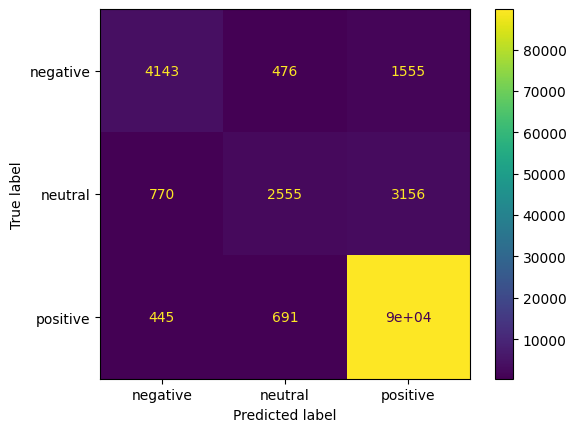

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred, labels=['negative', 'neutral', 'positive'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'positive'])
disp.plot();

# ROC curve

## Code based on code found on sklearn

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

class_of_interest = "positive"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]




In [ ]:
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.99
Macro-averaged One-vs-Rest ROC AUC score:
0.96


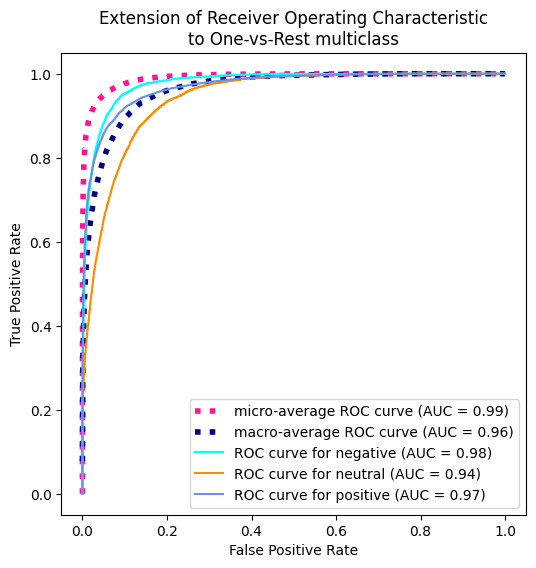

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

target_names = ['negative', 'neutral', 'positive']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        pred_proba[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

# Conclusions

Surprisingly, all of the models performed similarly, but the overall best seems to be baseline tfidf (we can see that in the classification report, it has the highest macro average and similar scores for everything else).
This could be as a result of the use of RandomizedSearchCV, so the hyperparameter tuning may not have been the most optimal.
The baseline performing better than the preprocessed does not come as a surprise. In the sentence preprocessing method, stopwords are removed, some of which may be somewhat significant. Additionally, stemming and lemmatizing may reduce a word too much and cause it to be generalized too much.

That being said, the tfidf tests seemed to be significantly faster at training than the bag of words.
